# Raman
## Raman Peaks Mapping

**Raman Mapping `Mapping Raman MoS2 Lines.txt`**

Expt setting:

- Data collection time: 2025/5/21
- Sampling site: centre, edge of the growth zone
- Exposure time: 0.2s / data point
- Laser Power: 5%
- magnification: 100x
- Laser setting: central $\lambda$ = 950 cm^-1 ; laser = `532`nm ; grating: 1800 vis
- Step-size: 0.5um

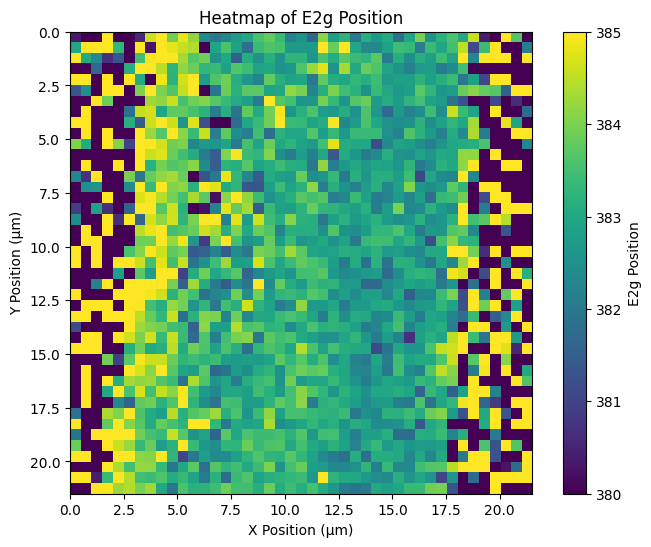

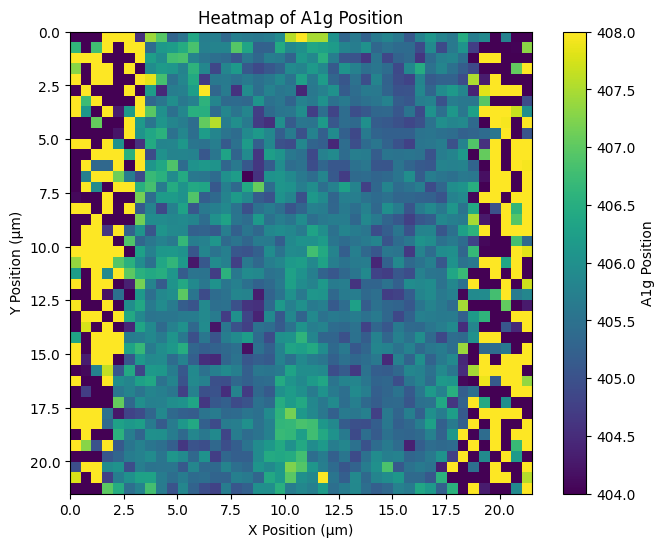

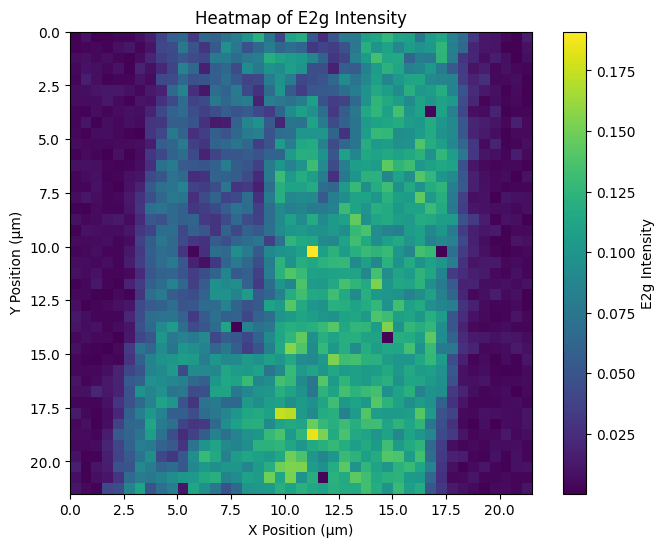

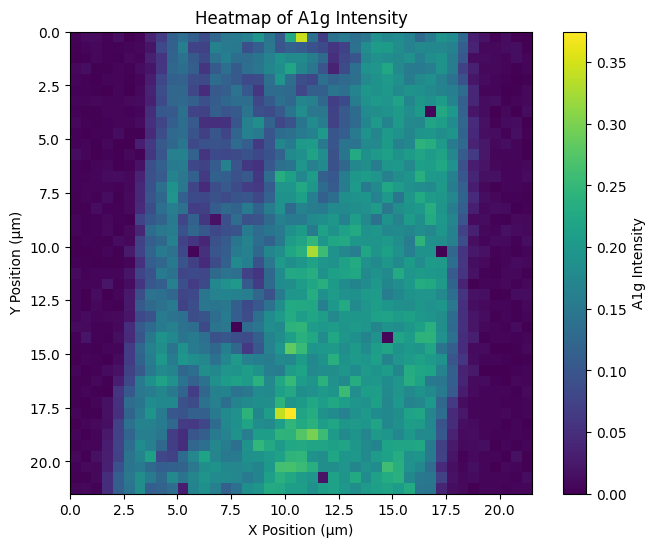

In [ ]:
from ramanpl import Mapping
# Define your custom_peaks and data_range
custom_peaks = {                            # Fitting-params are given as [wavenumber, scale, amplitude] form
    'E2g': ([380, 0, 0], [385, 3, 10]),     # necessary for 2D materials
    'A1g': ([404, 0, 0], [408, 3, 20]),     # necessary for 2D materials
    'Si':  ([520, 0, 0], [525, 2, 30])      # necessary for Si substrate
}
data_range = (0, 1012) # based on central wavelength 520cm-1, 532nm, 1800vis gratings, there are total 1013 data points  
step_size = 0.5  # Actual step-size of your mapping, unit: micro meters/um

# Initialise the modules
raman_map = Mapping.RamanMapping('Mapping Raman MoS2 Lines.txt', 
                        custom_peaks, 
                        data_range,
                        normalize=True,            # Normalize spectra
                        background_remove=True,    # Enable background removal
                        poly_degree=2,
                        step_size=step_size,)

# Display optical image (optional)
raman_map.show_optical_image()

# Fit spectra
raman_map.fit_spectra()


# Position plot (requires peak_name)
raman_map.plot_heatmap(peak_name="E2g", data_type='position')
raman_map.plot_heatmap(peak_name="A1g", data_type='position',filter_range=[404, 408])

# Position plot (requires peak_name)
raman_map.plot_heatmap(peak_name="E2g", data_type='intensity')
raman_map.plot_heatmap(peak_name="A1g", data_type='intensity')

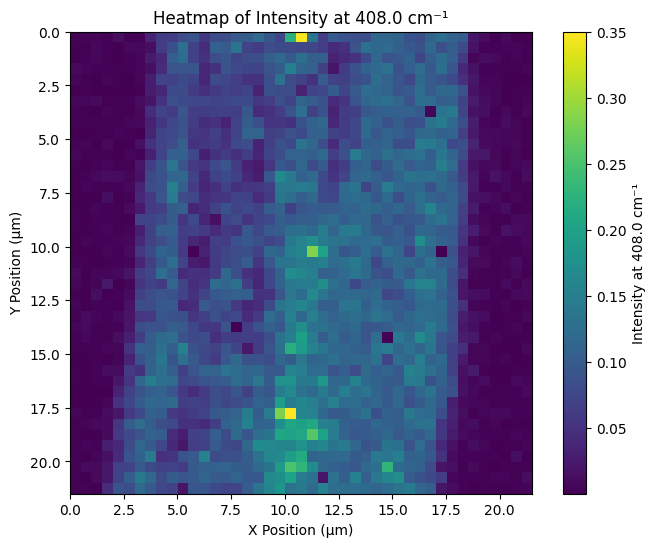

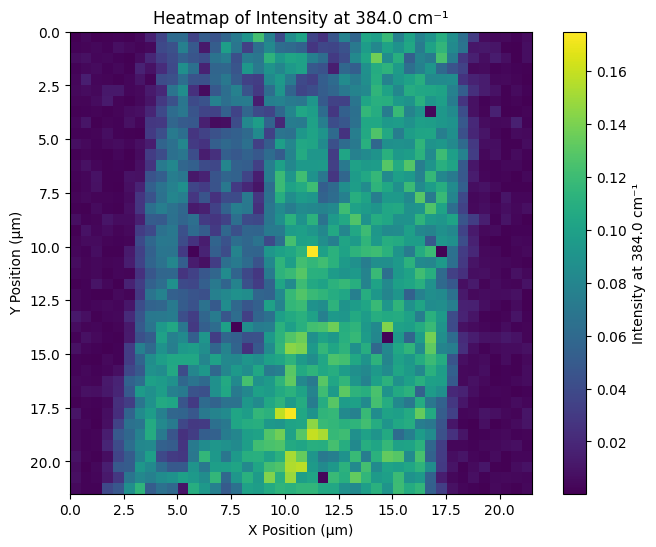

In [12]:
# Plot intensity at a specific wavenumber
raman_map.plot_heatmap(data_type='specific_intensity', 
                       specific_wavenumber=408.0    # in Float form, e.g. 418.0, 520.0
                       )
raman_map.plot_heatmap(data_type='specific_intensity', specific_wavenumber=384.0)

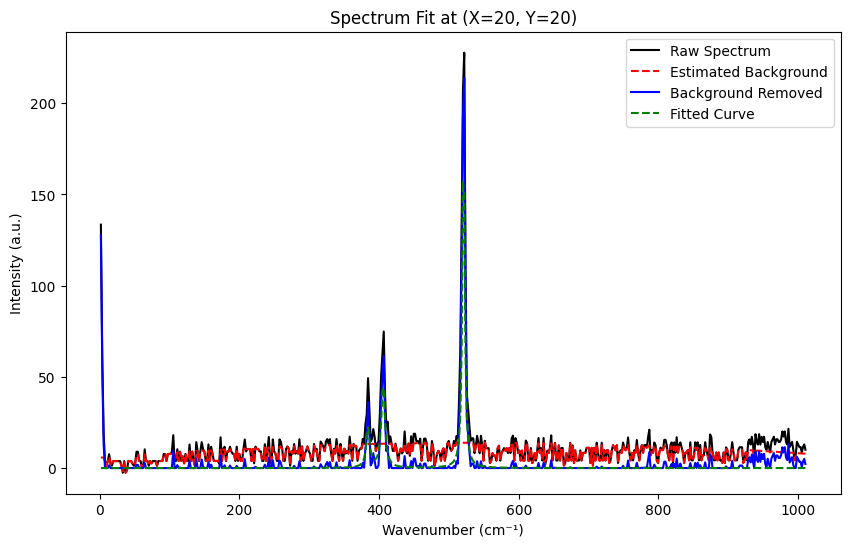

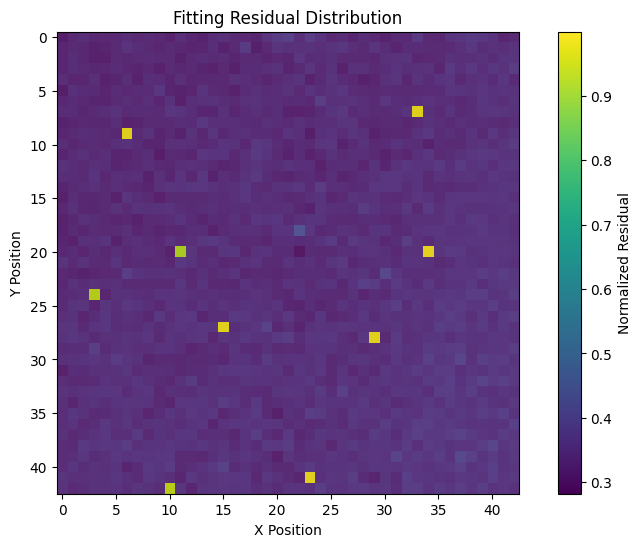

In [13]:
# To verify effectiveness of the fitting, we can plot spectrum fitting at a specific point
raman_map.plot_spectrum_fit(x=20, y=20) 

# Also you can check if residual is below threshold
raman_map.plot_residual_distribution(threshold=0.5 # Residual above shreshold will be marked red colour
                                     )

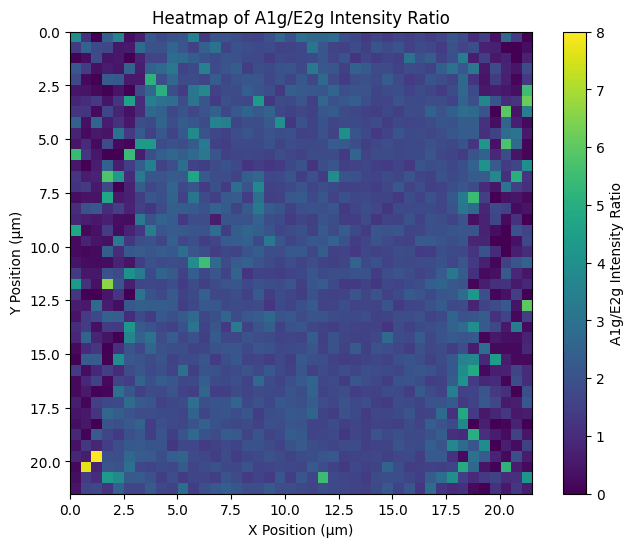

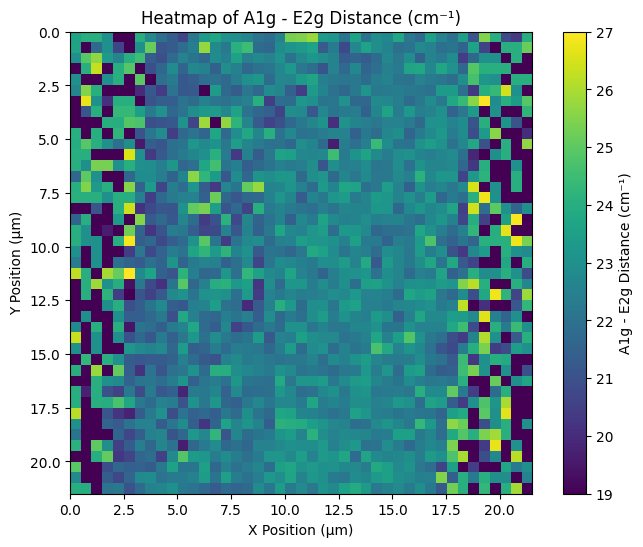

In [14]:
# Plot heatmap of A1g peak to E2g peak intensity ratio
raman_map.plot_ratio_heatmap(ratio_type='A1g/E2g', filter_range=[0, 8])

# Plot heatmap of A1g - E2g wavenumber difference
raman_map.plot_heatmap(data_type='distance',filter_range=[19,27])


## Raman Peak Area Integration

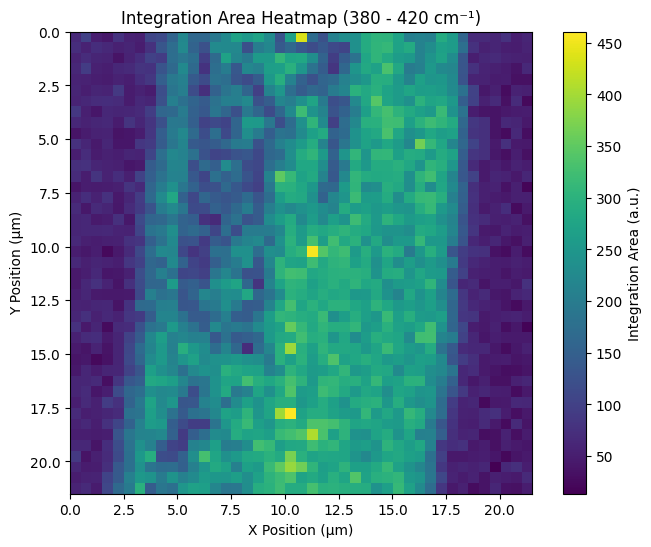

In [1]:
from ramanpl import Mapping

# Define integration parameters
integration_range = (380, 420)  # Range of intergrated spectrum range, unit cm-1
step_size = 0.5  # Check your actual step-size

# Initialise the class module
raman_integration = Mapping.Raman_Integration('Mapping Raman MoS2 Lines.txt', 
                                      integration_range=integration_range, 
                                      step_size=step_size, 
                                      background_remove=True,
                                      poly_degree=2)
# Display optcial image (optional)
raman_integration.show_optical_image()

# Calculate integrated area
raman_integration.calculate_integration()

# Plot heatmap of integration
raman_integration.plot_integration_heatmap()

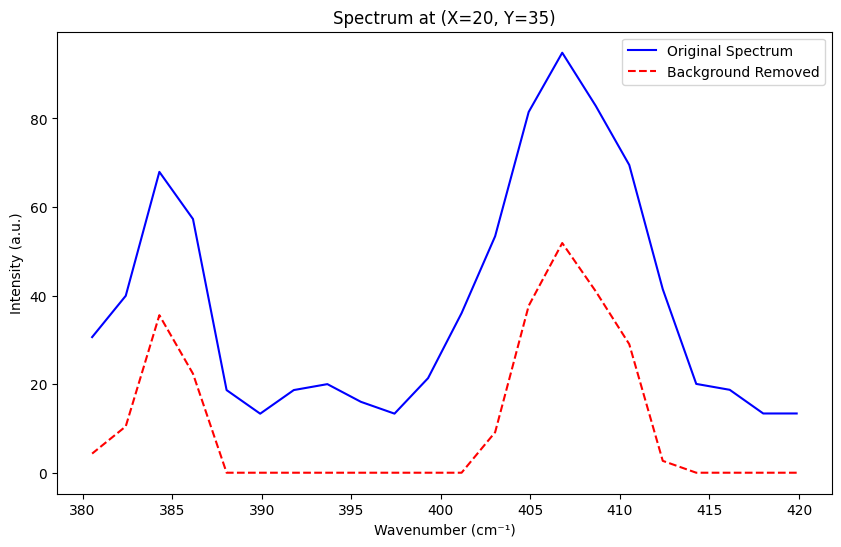

In [10]:
# Check spectrum background removal
raman_integration.plot_spectrum(x=20, y=35)